In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from os import listdir
from os.path import isfile, join
import string
import re

# **Data Preparation**

In [ ]:
pos_sentiment = list()
neg_sentiment = list()

In [ ]:
data_files = ['rt-polarity.pos', 'rt-polarity.neg']

In [ ]:
count = 0
for file in data_files:
  file_descriptor = open(file, 'rb')
  lines = file_descriptor.read().decode('utf-8','ignore').splitlines()
  for sentence in lines:
    if(count == 0):
        pos_sentiment.append(sentence)
    else:
        neg_sentiment.append(sentence)   
  count += 1
  file_descriptor.close()

In [ ]:
print("The number of sentences in positive sentiment file = ",len(pos_sentiment))
print("The number of sentences in negative sentiment file = ",len(neg_sentiment))

The number of sentences in positive sentiment file =  5331
The number of sentences in negative sentiment file =  5331


In [ ]:
X_train = pos_sentiment[:4500] + neg_sentiment[:4500]

X_test = pos_sentiment[4500:] + neg_sentiment[4500:]

In [ ]:
y_train = [0]*4500 + [1]*4500

y_test = [0]*831 + [1]*831

In [ ]:
print("The number of sentences in X_train = ",len(X_train))
print("The number of sentences in X_test = ",len(X_test))

print("length of y_train = ", len(y_train))
print("length of y_test = ", len(y_test))

The number of sentences in X_train =  9000
The number of sentences in X_test =  1662
length of y_train =  9000
length of y_test =  1662


In [ ]:
# printing all the words of length less than 3 except no
lists = []
for text in X_train:
  words =[w for w in text.split() if len(w)<3 and w not in ['no']]
  lists.append(words)

# **Preprocessing**


*   **Replacing contractions with their meanings** 
*   **Removing all non-alphanumeric and symbols**
*   **Removing the words of length less than 3 from the text except no**



In [ ]:
!pip install contractions

In [ ]:
import contractions

In [ ]:
pp_X_train = list()
alphaPattern = "[^a-z0-9<>]"
for text in X_train:
  pp_text = contractions.fix(text)
  pp_text = re.sub(alphaPattern, ' ', pp_text)
  pp_text = ' '.join([w for w in pp_text.split() if len(w)>2 and w not in ['no']])
  pp_X_train.append(pp_text)

In [ ]:
pp_X_test = list()
alphaPattern = "[^a-z0-9<>]"
for text in X_test:
  pp_text = contractions.fix(text)
  pp_text = re.sub(alphaPattern, ' ', pp_text)
  pp_text = ' '.join([w for w in pp_text.split() if len(w)>2 and w not in ['no']])
  pp_X_test.append(pp_text)

In [ ]:
pp_X_train[4]

'emerges something rare issue movie that honest and keenly observed that does not feel like one'

In [ ]:
len(pp_X_train)

9000

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

lemmatizer = WordNetLemmatizer()

lm_X_train = []
for s in pp_X_train:
  sent = []
  for word in word_tokenize(s):
    sent.append(lemmatizer.lemmatize(word))
  lm_X_train.append(" ".join([i for i in sent]))

In [ ]:
lm_X_test = []
for s in pp_X_test:
  sent = []
  for word in word_tokenize(s):
    sent.append(lemmatizer.lemmatize(word))
  lm_X_test.append(" ".join([i for i in sent]))

In [ ]:
type(lm_X_train[0])

str

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

preprocessed_X_train = []
for sentence in lm_X_train:
    preprocessed_X_train.append(" ".join([stemmer.stem(i) for i in sentence.split()])) 

In [ ]:
type(preprocessed_X_train[0])

str

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.remove('but')

final_X_train = []
for sentence in lm_X_train:
    final_X_train.append(" ".join([words for words in sentence.split() if not words in stop_words]))

In [ ]:
len(final_X_train)

9000

In [ ]:
final_X_test = []
for sentence in lm_X_test:
    final_X_test.append(" ".join([words for words in sentence.split() if not words in stop_words]))

## **Glove Embedding**

In [ ]:
import numpy as np
# load the whole embedding into memory
embeddings_index = dict()

f = open('/content/drive/MyDrive/IISc_3rd_sem/DLNLP/Assignment_3/glove.6B.100d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.'% len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
print(embeddings_index['the'])

[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.27062 ]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(lm_X_train)
sequences = tokenizer_obj.texts_to_sequences(lm_X_train)

#pad sequences
word_index = tokenizer_obj.word_index
print("number of unique tokens = ", len(word_index))

max_len = max([len(s.split()) for s in lm_X_train])

padded_sequences = pad_sequences(sequences, maxlen = max_len)
#vocab_size = len(tokenizer_obj.word_index)+1

number of unique tokens =  15183


In [ ]:
tokenizer_obj.fit_on_texts(final_X_test)
test_sequences = tokenizer_obj.texts_to_sequences(final_X_test)

#pad sequences
test_word_index = tokenizer_obj.word_index
print("number of unique tokens = ", len(test_word_index))

test_max_len = max([len(s.split()) for s in final_X_test])

test_padded_sequences = pad_sequences(test_sequences, maxlen = test_max_len)
#vocab_size = len(tokenizer_obj.word_index)+1

number of unique tokens =  16335


In [ ]:
word_index['xxx']

1676

In [ ]:
max_len

31

In [ ]:
num_words = len(word_index) + 1
glove_matrix = np.zeros((num_words, 100))

for word, i in word_index.items():
  if i > num_words:
    continue
  glove_vector = embeddings_index.get(word)

  """if glove_vector is None:
    print(word)"""

  if glove_vector is not None:
    glove_matrix[i] = glove_vector

In [ ]:
glove_matrix[1791]

array([-3.39940004e-03,  5.16589999e-01,  6.48639977e-01, -4.14579988e-01,
       -3.50059986e-01,  2.34390005e-01, -1.31390005e-01, -3.65469992e-01,
        7.71539986e-01,  2.07020000e-01,  4.08880003e-02,  6.93970025e-01,
       -4.73910004e-01, -6.16250001e-03,  4.10549998e-01,  8.14680010e-02,
       -7.61810005e-01, -8.90360028e-02,  9.59190011e-01,  3.08910012e-01,
        4.41740006e-01,  3.16489995e-01,  5.70309997e-01, -3.64520013e-01,
        6.83329999e-02,  3.56319994e-02, -4.29100007e-01,  8.55709985e-02,
       -3.60170007e-01, -2.84240007e-01, -2.01590002e-01, -2.15680003e-02,
       -2.89669991e-01, -3.37909997e-01, -5.20850003e-01,  3.93020004e-01,
       -1.82569996e-01, -5.90709984e-01,  2.22509995e-01, -5.40390015e-01,
        6.79050028e-01,  3.55740011e-01, -5.22040009e-01,  1.06430002e-01,
       -4.38279986e-01,  7.91099966e-02,  6.10360026e-01,  2.96480000e-01,
       -1.50779998e-02, -4.58009988e-01,  2.69400001e-01,  9.00010020e-02,
        5.91660023e-01, -

In [ ]:
embeddings_index['xxx']

array([-0.3687  ,  0.41059 ,  1.565   , -0.1187  , -0.32459 ,  0.39897 ,
        0.35587 , -0.17277 ,  0.38739 ,  0.51668 ,  0.090743,  0.23561 ,
       -0.85961 , -0.50437 , -0.17357 ,  0.35341 ,  0.17042 , -0.299   ,
       -0.5052  , -0.74482 ,  0.43591 , -0.38928 , -0.89028 ,  1.2465  ,
        0.13994 , -0.30271 ,  0.58277 ,  0.33706 ,  0.36108 ,  0.14702 ,
        0.51448 , -0.63922 ,  0.028113, -0.53355 , -0.45277 ,  0.13799 ,
       -0.91906 ,  0.048266, -0.081248,  0.24234 ,  0.24568 ,  0.3748  ,
       -0.72479 , -0.87584 ,  0.003958,  0.19572 , -1.151   , -0.22924 ,
        0.11799 , -0.66704 ,  0.08724 ,  0.48058 ,  0.14039 , -0.18884 ,
       -1.0674  , -0.051663, -0.16704 ,  0.27572 ,  0.25151 ,  0.48217 ,
       -1.0164  ,  0.21111 , -0.27002 , -0.3216  ,  0.39403 ,  0.20284 ,
        0.33473 ,  0.20013 , -0.25163 ,  0.65423 ,  0.76122 , -0.1537  ,
       -0.52411 , -0.026835,  0.3317  ,  0.28225 ,  0.042049,  0.58157 ,
       -0.41904 , -0.63762 , -0.79662 , -0.99222 , 

In [1]:
from keras.models import Sequential
from keras.layer import Dense, Embedding, LSTM, GRU
from keras.layes.embeddings import Embedding
from keras.initializers import Constant

model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer = Constant(embedding_matrix),
                            input_length=max_length,
                            trainable = False)

model.add(embedding_layer)
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Word2Vec**

In [ ]:
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
Word2Vec_model = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import pickle
w2v_embedding_dict = open("w2v_dict.pkl", "wb")
pickle.dump(Word2Vec_model, w2v_embedding_dict)
w2v_embedding_dict.close()

In [ ]:
import pickle
w2v_embed = open("/content/w2v_dict.pkl", "rb")
w2v_embed_dict = pickle.load(w2v_embed)

In [ ]:
word2vec_matrix = np.zeros((num_words, 300))
count = 0
for word, i in word_index.items():
  if i > num_words:
    continue

  if word not in w2v_embed_dict.vocab:
    count += 1
    continue

  word2vec_vector = w2v_embed_dict[word]

  """if glove_vector is None:
    print(word)"""

  if word2vec_vector is not None:
    word2vec_matrix[i] = word2vec_vector

In [ ]:
count

1617

## **FastText**

In [ ]:
import gensim.downloader
fastText_embed = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
import pickle
fastText_embedding_dict = open("fastText_dict.pkl", "wb")
pickle.dump(fastText_embed, fastText_embedding_dict)
fastText_embedding_dict.close()

In [ ]:
fastText_embed = open("/content/fastText_dict.pkl", "rb")
fastText_embed_dict = pickle.load(fastText_embed)

In [ ]:
fastText_matrix = np.zeros((num_words, 300))
count = 0
for word, i in word_index.items():
  if i > num_words:
    continue

  if word not in  fastText_embed_dict.vocab:
    count += 1
    continue

  fastText_vector = fastText_embed_dict[word]

  """if glove_vector is None:
    print(word)"""

  if fastText_vector is not None:
    fastText_matrix[i] = fastText_vector

In [ ]:
count

1153

In [ ]:
## This block is to create the embedding layer

vocab_size = glove_matrix.shape[0]
vector_size = glove_matrix.shape[1]
 
embedding_glove = torch.nn.Embedding(num_embeddings = vocab_size,embedding_dim=vector_size)

embedding_glove.weight = torch.nn.Parameter(torch.tensor(glove_matrix, dtype=torch.float32))

In [ ]:
embedding_glove.weight.requires_grad=False

In [ ]:
embedding_vec = embedding_glove(torch.LongTensor([[0,1]]))
print(embedding_glove)
print(embedding_vec.shape)

Embedding(15184, 100)
torch.Size([1, 2, 100])


In [ ]:
vocab_size = word2vec_matrix.shape[0]
vector_size = word2vec_matrix.shape[1]
 
embedding_word2vec = nn.Embedding(num_embeddings = vocab_size, embedding_dim = vector_size)

embedding_word2vec.weight=torch.nn.Parameter(torch.tensor(word2vec_matrix, dtype=torch.float32))

In [ ]:
embedding_word2vec.weight.requires_grad = False

In [ ]:
vocab_size = fastText_matrix.shape[0]
vector_size = fastText_matrix.shape[1]
 
embedding_fasttext = nn.Embedding(num_embeddings=vocab_size,embedding_dim=vector_size)

embedding_fasttext.weight = torch.nn.Parameter(torch.tensor(fastText_matrix,dtype=torch.float32))

In [ ]:
embedding_fasttext.weight.requires_grad = False

In [ ]:

class no_DME(torch.nn.Module):
    def __init__(self , embedding_dim, hidden_dim):
        super(no_DME, self).__init__()


        ## Here we only have one embedding. We can choose embedding from 1. embedding_glove , 2. embedding_word2vec , 3. embedding_fasttext
        self.embedding = embedding_word2vec

        ## Now we will have a lstm to encode a sentence
        self.lstm = nn.LSTM(embedding_dim , hidden_dim)

        ### Add the below line if you want bidirectional model
        ## self.lstm = nn.LSTM(embedding_dim , hidden_dim , bidirectional=bidirectional)

        ## Now a FFNN which will Find the class of the sentence

        ## I have 2 choices here 1. Taking the last layer of lstm as input which will represent the sentence
        ## 2. Or i could take all the hidden stage output but if we are taking this then we will have to fix the 
        ## Length of the sentence. I could do it . Maybe if the performance for this is very low

        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(hidden_dim, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 1),
            torch.nn.Sigmoid() ## So that this will give the probability of being label 1
        )

    ## x is a tensor representing a sentence. x could be in batches but i am taking it to be only 1 sentence
    def forward(self, x):

        ## First get the embedding from the embedding layer

        first = self.embedding(x.long())

        lstm_out, _ = self.lstm(first.view(len(x), 1, -1))
        
        ## print("shape of lstm_out = " , lstm_out[-1][0].shape)

        prob_of_label1 = self.linear_relu_stack(lstm_out[-1][0])

        ## Let sentence_context is the output of lstm
        return prob_of_label1


In [ ]:
## Making the architecture for Dynamic Meta Embedding
class DME(torch.nn.Module):
    def __init__(self , glove_embedding_dim , word2vec_embedding_dim , fasttext_embedding_dim , common_dim , hidden_dim):
        super(DME, self).__init__()

        ## These are the 3 embedding layers
        ## See once its gradient is Freezed or not
        self.embedding_glove_ = embedding_glove
        self.embedding_word2vec_ = embedding_word2vec
        self.embedding_fasttext_ = embedding_fasttext

        ## Now they will pass through separate linear layers for themselves
        self.linear1 = nn.Linear( glove_embedding_dim , common_dim )
        self.linear2 = nn.Linear( word2vec_embedding_dim , common_dim )
        self.linear3 = nn.Linear( fasttext_embedding_dim , common_dim )

        ## Now they will pass through a single layer one by one
        ## This will compute the attention to be given for each embedding

        self.linear_sigmoid_stack = nn.Sequential(
            nn.Linear( common_dim , 1 ),
            nn.Sigmoid()
        )
  
        ## Now we will have a lstm to encode a sentence
        self.lstm = nn.LSTM(common_dim , hidden_dim , bidirectional = False) 
        ## Now a FFNN which will Find the class of the sentence

        ## I have 2 choices here 1. Taking the last layer of lstm as input which will represent the sentence
        ## 2. Or i could take all the hidden stage output but if we are taking this then we will have to fix the 
        ## Length of the sentence. I could do it . Maybe if the performance for this is very low

        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(hidden_dim, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 1),
            torch.nn.Sigmoid() ## So that this will give the probability of being label 1
        )


        '''
        Use this if 1 layer doesnot give proper output

        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(input_size, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 3)
        )
        '''

    ## x is a tensor representing a sentence. x could be in batches but i am taking it to be only 1 sentence
    def forward(self, x):

        ## First get the embedding from each embedding layer
        ## If given in batches the embedding layer assumes the sequeneces should have equal length

        ## Now i am assuming that i am giving input one sequence only

        first = self.embedding_glove_(x.long())
        second = self.embedding_word2vec_(x.long())
        third = self.embedding_fasttext_(x.long())

        '''
        print("Shape of first = " , first.shape)
        print("Shape of second = " , second.shape)
        print("Shape of third = " , third.shape)
        '''

        first_l = self.linear1(first)
        second_l = self.linear2(second)
        third_l = self.linear3(third)

        '''
        print("Shape of first_l = " , first_l.shape)
        print("Shape of second_l = " , second_l.shape)
        print("Shape of third_l = " , third_l.shape)
        '''

        ## Now that they are passed through the linear layer 
        ## It is slighlty tricky how i would apply a common layer to all

        ## I will get here the sentence
        ## Now how do i find the encoding of the 
        
        attn1 = self.linear_sigmoid_stack(first_l)
        attn2 = self.linear_sigmoid_stack(second_l)
        attn3 = self.linear_sigmoid_stack(third_l)

        '''
        print("Shape of attn1 = " , attn1.shape)
        print("Shape of attn2 = " , attn2.shape)
        print("Shape of attn3 = " , attn3.shape)
        '''

        ## I have done this assuming that the x contains only 1 string
        ## For batches i have to change some things here

        embed = torch.mul( first_l , attn1.view(len(attn1))[: , None] ) + torch.mul( second_l , attn2.view(len(attn2))[: , None] ) + torch.mul( third_l , attn3.view(len(attn3))[: , None] )

        ## print("The shape of embed = " , embed.shape)

        ## Now this is the embedding of the sentence
        ## Now i will pass the embed into the lstm
        ## ANd will take only the last hidden output

        lstm_out, _ = self.lstm(embed.view(len(x), 1, -1))
        
        ## print("shape of lstm_out = " , lstm_out[-1][0].shape)

        prob_of_label1 = self.linear_relu_stack(lstm_out[-1][0])

        ## Let sentence_context is the output of lstm
        return prob_of_label1

In [ ]:
## Parameters are - globe_embedding_dim , word2vec_embedding_dim , fasttext_embedding_dim , common_dim , hidden_dim
import torch.optim as optim
model = DME( 100 , 300 , 300 , 100 , 100 )

loss_function = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
## Run this code if doing the vanilla model
import torch.optim as optim
model = no_DME( 300 , 128 )

loss_function = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# split the data into training set and the validation set

"""validation_split = 0.2

indices = np.arange(padded_sequences.shape[0])
np.random.shuffle(indices)
padded_sequences = padded_sequences[indices]
labels =  np.array(y_train,dtype = np.int32)

labels = labels[indices]


classes = 2
class_array = np.eye(classes)[labels]

num_validation_samples = int(validation_split * padded_sequences.shape[0])

X_train_pad = padded_sequences[:-num_validation_samples]
y_train_final = class_array[:-num_validation_samples]
X_validate_pad = padded_sequences[-num_validation_samples:]
y_validate_final = class_array[-num_validation_samples:]"""

from sklearn.utils import shuffle
x_tr_seq, y_train = shuffle(padded_sequences, y_train)

m = int(0.8*len(y_train))
X_train_pad = x_tr_seq[:m]
X_validate_pad = x_tr_seq[m:]
y_validate_final = y_train[m:]
y_train_final = y_train[:m]

In [ ]:
print(X_validate_pad.shape)
print(X_train_pad.shape)
print(len(y_train_final))
print(len(y_validate_final))

(1800, 41)
(7200, 41)
7200
1800


In [ ]:
train_data_tensor = torch.from_numpy(X_train_pad)
validation_data_tensor = torch.from_numpy(X_validate_pad)

train_label_tensor = torch.from_numpy(np.array(y_train_final))
validation_label_tensor = torch.from_numpy(np.array(y_validate_final))

In [ ]:
test_data_tensor = torch.from_numpy((test_padded_sequences))
test_label_tensor = torch.from_numpy(np.array(y_test))

In [ ]:
## It will take the dataset as list tensor input and the target as a tensor output and it'll compute the accuracy
## Also returns the loss 

def accuracy(dataset , target):
  total_loss = 0.0
  correct = 0
  for i in range(len(dataset)):
    data_tensor = dataset[i]
    label_tensor = target[i].view(1)

    if (len(data_tensor) == 0):
      if label_tensor.item() == 1:
        correct = correct + 1
      continue

    with torch.no_grad():
      pred = model(data_tensor)

      ##print(pred.shape , label_tensor.shape)

      if (pred >= 0.5 and label_tensor.item() == 1):
        correct = correct + 1
      
      if (pred < 0.5 and label_tensor.item() == 0):
        correct = correct + 1

      loss = loss_function(pred , label_tensor.float())
      total_loss = total_loss + loss.item()

      if (i%500 == 0):
        print("Loss at " , i , "th iteration is : " , loss.item())
  
  return total_loss , correct / len(dataset)

In [ ]:
epochs = 10

training_loss = []
validation_loss = []

training_acc = []
validation_acc = []

test_acc = []
test_loss = []

for epoch in range(epochs):

  loss_per_epoch = 0
  print("Epoch " , epoch , " is starting...")
  print("__________________________________")

  ## Now i will try to feed each of the sentence into the 
  for i in range(len(train_data_tensor)):
    data_tensor = train_data_tensor[i]
    label_tensor = train_label_tensor[i].view(1)

    model.zero_grad()

    pred = model(data_tensor)

    ##print(pred.shape , label_tensor.shape)

    loss = loss_function(pred , label_tensor.float())
    loss_per_epoch = loss_per_epoch + loss.item()

    if (i%500 == 0):
      print("Loss at " , i , "th iteration is : " , loss.item())

    loss.backward()
    optimizer.step()

  print("Total loss in this epoch is  = " , loss_per_epoch)

  val_loss , val_acc = accuracy( validation_data_tensor , validation_label_tensor )
  validation_loss.append(val_loss)
  validation_acc.append(val_acc)
  train_loss , train_acc = accuracy( train_data_tensor , train_label_tensor )
  training_loss.append(train_loss)
  training_acc.append(train_acc)
  """tes_loss , tes_acc = accuracy( test_data_tensor , test_label_tensor )
  test_loss.append(tes_loss)
  test_acc.append(tes_acc)"""

Epoch  0  is starting...
__________________________________
Loss at  0 th iteration is :  0.6879064440727234
Loss at  500 th iteration is :  0.8191784620285034
Loss at  1000 th iteration is :  0.7234711050987244
Loss at  1500 th iteration is :  0.7361924648284912
Loss at  2000 th iteration is :  0.7187933921813965
Loss at  2500 th iteration is :  0.6952921152114868
Loss at  3000 th iteration is :  0.6876242160797119
Loss at  3500 th iteration is :  0.6641831398010254
Loss at  4000 th iteration is :  0.7196163535118103
Loss at  4500 th iteration is :  0.7082860469818115
Loss at  5000 th iteration is :  0.6884216070175171
Loss at  5500 th iteration is :  0.7132075428962708
Loss at  6000 th iteration is :  0.7121844291687012
Loss at  6500 th iteration is :  0.6873313188552856
Loss at  7000 th iteration is :  0.6890898942947388
Total loss in this epoch is  =  5001.84615072608
Loss at  0 th iteration is :  0.6911307573318481
Loss at  500 th iteration is :  0.6906081438064575
Loss at  1000 t

In [ ]:
import matplotlib.pyplot as plt

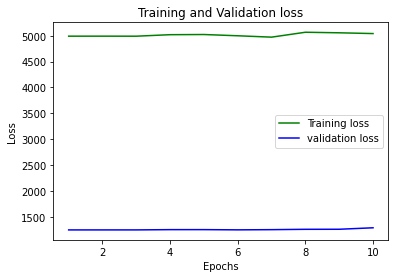

In [ ]:
loss_train = training_loss
loss_val = validation_loss
loss_test = test_loss

epochs = range(1, 11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
#plt.plot(epochs, loss_test , 'r' , label = 'Test loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

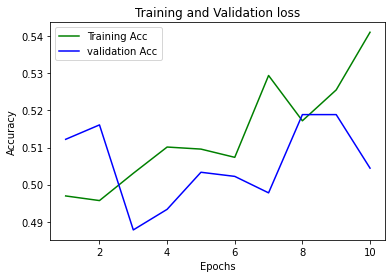

In [ ]:
acc_train = training_acc
acc_val = validation_acc
acc_test = test_acc

epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training Acc')
plt.plot(epochs, acc_val, 'b', label='validation Acc')
#plt.plot(epochs, acc_test, 'r' , label = 'Test Acc')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(accuracy( test_data_tensor , test_label_tensor ))

Loss at  0 th iteration is :  0.8490163087844849
Loss at  500 th iteration is :  0.8107059597969055
Loss at  1000 th iteration is :  1.445365309715271
Loss at  1500 th iteration is :  0.6460733413696289
(1215.5463653504949, 0.4963898916967509)
